<a href="https://colab.research.google.com/github/not-so-lucky/ProgrammingAssignment2/blob/master/Lokinder_CIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Kamal Singh

Rollno - 2020MSBDA013


In [ ]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv (r'tatamotor.csv')
df

,Date,Open,High,Low,Close,AdjClose,Volume
0,18-07-2016,495.000000,505.000000,490.000000,492.649994,492.649994,7463954
1,19-07-2016,493.899994,503.500000,493.450012,499.250000,499.250000,7665519
2,20-07-2016,496.299988,502.450012,492.450012,493.899994,493.899994,5697901
3,21-07-2016,498.450012,500.000000,489.700012,491.049988,491.049988,3658371
4,22-07-2016,494.450012,508.450012,493.500000,507.200012,507.200012,5588143
...,...,...,...,...,...,...,...
1219,29-06-2021,342.649994,346.500000,339.600006,341.549988,341.549988,22462297
1220,30-06-2021,342.000000,345.350006,338.850006,339.600006,339.600006,18277841
1221,01-07-2021,341.500000,347.399994,341.200012,344.250000,344.250000,27944816
1222,02-07-2021,345.299988,345.549988,340.500000,344.899994,344.899994,18304387


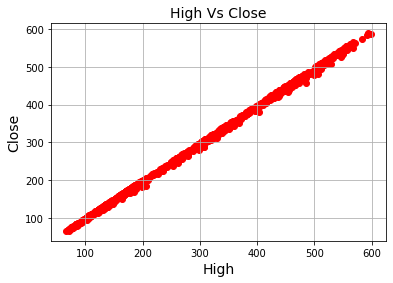

In [ ]:
plt.scatter(df['High'], df['Close'], color='red')
plt.title('High Vs Close', fontsize=14)
plt.xlabel('High', fontsize=14)
plt.ylabel('Close', fontsize=14)
plt.grid(True)
plt.show()
# Checking linearity

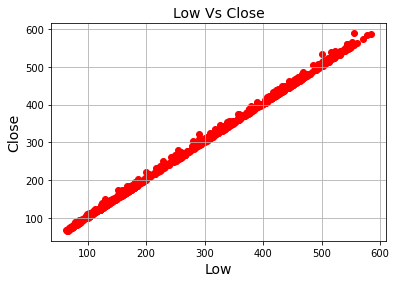

In [ ]:
plt.scatter(df['Low'], df['Close'], color='red')
plt.title('Low Vs Close', fontsize=14)
plt.xlabel('Low', fontsize=14)
plt.ylabel('Close', fontsize=14)
plt.grid(True)
plt.show()
# Checking linearity

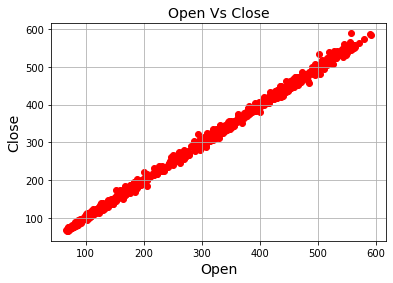

In [ ]:
plt.scatter(df['Open'], df['Close'], color='red')
plt.title('Open Vs Close', fontsize=14)
plt.xlabel('Open', fontsize=14)
plt.ylabel('Close', fontsize=14)
plt.grid(True)
plt.show()
# Checking linearity

In [ ]:
x = df[['Open', 'High', 'Low','Volume']]
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.04533161922404361
Coefficients:


[('Open', -0.5264835242925838),
 ('High', 0.8235219665768152),
 ('Low', 0.7005336035877142),
 ('Volume', -4.4426488043924905e-09)]

In [ ]:
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set:\n {}".format(y_pred_mlr))

Prediction for test set:
 [166.76829555 336.22051102 429.71104316 181.99004904 370.39468323
 373.77021051 163.39870434 424.32359772 108.06679763 515.53373481
 182.16706164 315.89496109 548.0827757  334.15056725 107.0287835
 272.10870066  86.16403728 458.79695254 268.40490619 427.36077615
  74.46181907 444.96977465 296.5285962  419.82436631 122.59351571
 333.26839643 267.02168827 422.27215171 204.64014102 504.89461607
 401.25998501 334.00197861 467.11068207 235.61079165 471.22748606
 158.66791964 157.60933703 343.53941226 376.50392034 198.21189213
 180.4295463  344.51984863 342.79754048 172.68306386  81.78654199
 543.9968041  190.02674273 450.97725506 484.11697146 162.25482136
 147.71836757 124.61364456 483.20927723 171.56846678 500.58450645
 134.55707999 106.87159851 296.15412659 169.70188867 180.55627413
 176.4203801  131.69328215 174.98388709 146.89554376 192.00633023
 159.63519641 470.79548231 417.8561504  342.27345898  84.41646956
 509.02776718 269.2266023  169.58253238 176.3146742

In [ ]:
mlr_diff = pd.DataFrame({ 'Close': y_test, 'Predicted Close': y_pred_mlr})
mlr_diff.head()

,Close,Predicted Close
596,166.949997,166.768296
432,336.450012,336.220511
318,428.399994,429.711043
629,181.199997,181.990049
389,368.750000,370.394683


In [ ]:
New_Open = 369.899994
New_High = 373.200012
New_Low = 368
#Close = 368.75
New_Volume = 8816777
print ('Predicted Close: \n', mlr.predict([[New_Open ,New_High, New_Low, New_Volume]]))

Predicted Close: 
 [370.39468323]


In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.98
Mean Absolute Error: 1.6266835296560462
Mean Square Error: 4.49932619161403
Root Mean Square Error: 2.121161519454384
